In [1]:
!pip install matplotlib
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
from finance_byu.summarize import summary
import pyarrow
import matplotlib.pyplot as plt
# !pip uninstall pandas
# !pip install pandas==2.2.3
print(pd.__version__)

# load_dotenv()  # reads .env file
# MERGED_PATH = os.getenv("MERGED_PATH")
# print(MERGED_PATH)

2.2.3


In [2]:
df = pd.read_feather("data/data_botq_2025.ftr")#MERGED_PATH)
# df.drop(columns=["indfmt", "consol", "popsrc", "datafmt", "curcd"])
# df.to_feather("data/data_botq_2025.ftr")

# df = df[(df.date >= pd.to_datetime('1980-01-01'))]

# df = df.loc[~df['cash'].isna()]
# df = df.loc[~df['current'].isna()]
# df['ret'] = df['ret']/100
df.rename(columns={"PERMNO": "permno", "MthCalDt": "date", "MthPrc": "prc", "MthRetx": "ret", "MthVol": "volume", 
                   "ShrOut": "shr", "CUSIP": "cusip", "Ticker": "ticker", "act": "current", "at": "assets", "ch": "cash"}, inplace=True)

print(df)
df.describe()

         permno        date     prc       ret        volume      shr  \
0         10026  1986-02-28   18.75  0.063830  7.390000e+05     1945   
1         10026  1986-03-31   21.25  0.133333  9.427600e+04     1945   
2         10026  1986-04-30   22.75  0.070588  4.958900e+04     1945   
3         10026  1986-05-30   32.00  0.406593  5.521800e+04     1945   
4         10026  1986-06-30   18.00 -0.156250  1.939700e+05     2918   
...         ...         ...     ...       ...           ...      ...   
1539782   93436  2024-08-30  214.11 -0.077390  1.610837e+09  3194640   
1539783   93436  2024-09-30  261.63  0.221942  1.604206e+09  3207000   
1539784   93436  2024-10-31  249.85 -0.045025  1.901431e+09  3210060   
1539785   93436  2024-11-29  345.16  0.381469  2.082131e+09  3210060   
1539786   93436  2024-12-31  403.84  0.170008  1.894644e+09  3210060   

            cusip ticker PrimaryExch  UGVKEY    datadate indfmt consol popsrc  \
0        46603210   JJSF           Q   12825  1985-09-

,permno,prc,ret,volume,shr,UGVKEY,current,assets,cash
count,1.539787e+06,1.535598e+06,1.535289e+06,1.528437e+06,1.539787e+06,1.539787e+06,913257.000000,1.142213e+06,1.095573e+06
mean,5.718360e+04,4.533095e+01,7.714166e-03,2.258865e+07,1.045393e+05,6.616768e+04,2106.232920,1.697980e+04,9.410406e+02
std,3.162504e+04,8.686124e+02,1.657142e-01,1.218081e+08,4.090442e+05,7.057409e+04,7994.011518,1.187006e+05,1.032315e+04
min,1.002600e+04,1.070000e-02,-1.000000e+00,0.000000e+00,1.000000e+00,1.004000e+03,0.000000,0.000000e+00,-1.501680e+02
25%,1.979300e+04,9.510000e+00,-5.000000e-02,4.600000e+05,7.586000e+03,1.238900e+04,46.784000,1.333290e+02,8.008000e+00
50%,7.506900e+04,2.188000e+01,2.329000e-03,2.458600e+06,2.470300e+04,2.933200e+04,235.373000,8.423000e+02,4.527900e+01
75%,8.677600e+04,4.171000e+01,5.401700e-02,1.180800e+07,7.175000e+04,1.366480e+05,1075.265000,4.482021e+03,2.297550e+02
max,9.343600e+04,1.416000e+05,2.658383e+01,2.279873e+10,2.920640e+07,3.561280e+05,229512.000000,4.002814e+06,6.561257e+05


In [3]:
df = df.loc[df.PrimaryExch.isin(["Q", "A", "N"])]
df = df.drop_duplicates(["permno", "date"], keep="first")
df.reset_index(drop=True, inplace=True)
print(df.describe())
df

             permno           prc           ret        volume           shr  \
count  1.304767e+06  1.304306e+06  1.304002e+06  1.297151e+06  1.304767e+06   
mean   5.803274e+04  4.471142e+01  8.446574e-03  2.249364e+07  1.171143e+05   
std    3.051293e+04  9.423327e+02  1.772425e-01  1.190321e+08  4.407379e+05   
min    1.002600e+04  1.070000e-02 -9.958300e-01  0.000000e+00  1.000000e+00   
25%    2.174700e+04  7.910000e+00 -5.627275e-02  5.473480e+05  1.016200e+04   
50%    7.518600e+04  1.828000e+01  1.642000e-03  2.879900e+06  2.959600e+04   
75%    8.553100e+04  3.756000e+01  6.000000e-02  1.302555e+07  8.135200e+04   
max    9.343600e+04  1.416000e+05  2.658383e+01  2.279873e+10  2.920640e+07   

             UGVKEY        current        assets          cash  
count  1.304767e+06  909237.000000  1.137450e+06  1.090881e+06  
mean   5.797948e+04    2114.755780  1.704611e+04  9.445359e+02  
std    6.730433e+04    8010.423782  1.189432e+05  1.034512e+04  
min    1.004000e+03       0.

,permno,date,prc,ret,volume,shr,cusip,ticker,PrimaryExch,UGVKEY,datadate,indfmt,consol,popsrc,datafmt,curcd,current,assets,cash,costat
0,10026,1986-02-28,18.75,0.063830,7.390000e+05,1945,46603210,JJSF,Q,12825,1985-09-30,INDL,C,D,STD,USD,5.159,13.039,NaN,A
1,10026,1986-03-31,21.25,0.133333,9.427600e+04,1945,46603210,JJSF,Q,12825,1985-09-30,INDL,C,D,STD,USD,5.159,13.039,NaN,A
2,10026,1986-04-30,22.75,0.070588,4.958900e+04,1945,46603210,JJSF,Q,12825,1985-09-30,INDL,C,D,STD,USD,5.159,13.039,NaN,A
3,10026,1986-05-30,32.00,0.406593,5.521800e+04,1945,46603210,JJSF,Q,12825,1985-09-30,INDL,C,D,STD,USD,5.159,13.039,NaN,A
4,10026,1986-06-30,18.00,-0.156250,1.939700e+05,2918,46603210,JJSF,Q,12825,1985-09-30,INDL,C,D,STD,USD,5.159,13.039,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304762,93436,2024-08-30,214.11,-0.077390,1.610837e+09,3194640,88160R10,TSLA,Q,184996,2023-12-31,INDL,C,D,STD,USD,49616.000,106618.000,16398.0,A
1304763,93436,2024-09-30,261.63,0.221942,1.604206e+09,3207000,88160R10,TSLA,Q,184996,2023-12-31,INDL,C,D,STD,USD,49616.000,106618.000,16398.0,A
1304764,93436,2024-10-31,249.85,-0.045025,1.901431e+09,3210060,88160R10,TSLA,Q,184996,2023-12-31,INDL,C,D,STD,USD,49616.000,106618.000,16398.0,A
1304765,93436,2024-11-29,345.16,0.381469,2.082131e+09,3210060,88160R10,TSLA,Q,184996,2023-12-31,INDL,C,D,STD,USD,49616.000,106618.000,16398.0,A


In [4]:
df["date"] = pd.to_datetime(df["date"])
df.sort_values(by=["permno", "date"], inplace=True)
print(df.describe())
df['logret'] = np.log(1 + df['ret'])
df['mom'] = df.groupby('permno')['logret'].apply(lambda x: x.rolling(12, min_periods=12).sum().shift(2)).reset_index(level=0, drop=True)
df['me'] = df['shr'] * df['prc']
df.describe()


             permno                           date           prc  \
count  1.304767e+06                        1304767  1.304306e+06   
mean   5.803274e+04  2009-11-26 06:39:31.772432128  4.471142e+01   
min    1.002600e+04            1980-01-31 00:00:00  1.070000e-02   
25%    2.174700e+04            2001-11-30 00:00:00  7.910000e+00   
50%    7.518600e+04            2012-01-31 00:00:00  1.828000e+01   
75%    8.553100e+04            2019-10-31 00:00:00  3.756000e+01   
max    9.343600e+04            2024-12-31 00:00:00  1.416000e+05   
std    3.051293e+04                            NaN  9.423327e+02   

                ret        volume           shr        UGVKEY        current  \
count  1.304002e+06  1.297151e+06  1.304767e+06  1.304767e+06  909237.000000   
mean   8.446574e-03  2.249364e+07  1.171143e+05  5.797948e+04    2114.755780   
min   -9.958300e-01  0.000000e+00  1.000000e+00  1.004000e+03       0.000000   
25%   -5.627275e-02  5.473480e+05  1.016200e+04  1.065800e+04      

,permno,date,prc,ret,volume,shr,UGVKEY,current,assets,cash,logret,mom,me
count,1.304767e+06,1304767,1.304306e+06,1.304002e+06,1.297151e+06,1.304767e+06,1.304767e+06,909237.000000,1.137450e+06,1.090881e+06,1.304002e+06,1.203402e+06,1.304306e+06
mean,5.803274e+04,2009-11-26 06:39:31.772432128,4.471142e+01,8.446574e-03,2.249364e+07,1.171143e+05,5.797948e+04,2114.755780,1.704611e+04,9.445359e+02,-3.347717e-03,-2.114555e-02,5.606172e+06
min,1.002600e+04,1980-01-31 00:00:00,1.070000e-02,-9.958300e-01,0.000000e+00,1.000000e+00,1.004000e+03,0.000000,0.000000e+00,-1.501680e+02,-5.479839e+00,-1.244821e+01,8.437500e+00
25%,2.174700e+04,2001-11-30 00:00:00,7.910000e+00,-5.627275e-02,5.473480e+05,1.016200e+04,1.065800e+04,47.585000,1.355650e+02,8.136000e+00,-5.791808e-02,-2.006640e-01,9.649398e+04
50%,7.518600e+04,2012-01-31 00:00:00,1.828000e+01,1.642000e-03,2.879900e+06,2.959600e+04,2.575100e+04,237.316000,8.508770e+02,4.567500e+01,1.640653e-03,3.288508e-02,4.457239e+05
75%,8.553100e+04,2019-10-31 00:00:00,3.756000e+01,6.000000e-02,1.302555e+07,8.135200e+04,1.017180e+05,1083.517000,4.508463e+03,2.307090e+02,5.826891e-02,2.402320e-01,2.157238e+06
max,9.343600e+04,2024-12-31 00:00:00,1.416000e+05,2.658383e+01,2.279873e+10,2.920640e+07,3.561280e+05,229512.000000,4.002814e+06,6.561257e+05,3.317230e+00,4.677826e+00,3.785304e+09
std,3.051293e+04,NaN,9.423327e+02,1.772425e-01,1.190321e+08,4.407379e+05,6.730433e+04,8010.423782,1.189432e+05,1.034512e+04,1.531164e-01,5.421908e-01,3.660953e+07


In [5]:
# 1) Are there duplicate (permno, date) rows?
print(df.loc[df.duplicated(subset=['permno','date'])])
print(df.duplicated(subset=['permno','date']).sum())

# 2) Earliest observation per permno (to see if some permnos have pre-1980 data)
print(df.groupby('permno')['date'].min().sort_values().head(10))

# 3) Frequency check for a typical permno
samp = df[df['permno']==392579].sort_values('date')
print(samp[['date','ret','logret']].head(20))

# 4) When the rolling window first becomes non-null per permno
def first_valid_mom_date(g):
    mom = g['logret'].rolling(12, min_periods=12).sum().shift(2)
    return mom.first_valid_index()
print(df.groupby('permno').apply(first_valid_mom_date).dropna().head(10))


Empty DataFrame
Columns: [permno, date, prc, ret, volume, shr, cusip, ticker, PrimaryExch, UGVKEY, datadate, indfmt, consol, popsrc, datafmt, curcd, current, assets, cash, costat, logret, mom, me]
Index: []

[0 rows x 23 columns]
0
permno
24766   1980-01-31
59089   1980-01-31
59176   1980-01-31
59185   1980-01-31
59221   1980-01-31
59248   1980-01-31
59256   1980-01-31
59328   1980-01-31
59344   1980-01-31
23309   1980-01-31
Name: date, dtype: datetime64[ns]
Empty DataFrame
Columns: [date, ret, logret]
Index: []
permno
10026      13.0
10028     480.0
10032     947.0
10044    1407.0
10065    1874.0
10066    2379.0
10094    2497.0
10104    2638.0
10107    3104.0
10108    3570.0
dtype: float64


/var/folders/2f/49s10q117cg1smy0rrygm53h0000gn/T/ipykernel_8871/1940469553.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(df.groupby('permno').apply(first_valid_mom_date).dropna().head(10))


In [6]:
df['prclag'] = df.groupby('permno')['prc'].shift()
df['melag'] = df.groupby('permno')['me'].shift()
df["assets"] = df.groupby("permno")["assets"].ffill()
df["current"] = df.groupby("permno")["current"].ffill()
df["cash"] = df.groupby("permno")["cash"].ffill()
# df['cashtoasset'] = df["cash"] / df["assets"]
df['currenttoassetlag'] = (df["current"] / df["assets"]).shift()
df.drop(columns=["cash", "current", "assets"], inplace=True)
df = df.loc[(df.date >= pd.to_datetime("1980-02-01")) & (df.date < pd.to_datetime("2011-01-01"))]

dfmom = df.query("mom == mom and prclag >= 5 and melag >= 100").reset_index(drop=True)
dfmom.sort_values("date")

,permno,date,prc,ret,volume,shr,cusip,ticker,PrimaryExch,UGVKEY,...,popsrc,datafmt,curcd,costat,logret,mom,me,prclag,melag,currenttoassetlag
126153,41216,1981-02-27,11.125,-0.032609,505400.0,4742,83425610,SOD,A,9799,...,D,STD,USD,A,-0.033153,0.831984,52754.75,11.50,54510.00,0.699348
140918,47088,1981-02-27,57.500,0.138614,NaN,2869,48483610,KCLI,Q,6333,...,D,STD,USD,A,0.129812,-0.106333,164967.50,50.50,144884.50,NaN
163052,52717,1981-02-27,4.375,-0.125000,NaN,1132,58514510,MDTA,Q,7232,...,D,STD,USD,A,-0.133531,0.159629,4952.50,5.00,5660.00,0.891859
233723,71475,1981-02-27,11.250,-0.021739,NaN,1988,84250210,SWTR,Q,9849,...,D,STD,USD,A,-0.021979,-0.134919,22365.00,11.50,22862.00,0.077797
140741,46923,1981-02-27,13.750,-0.051724,NaN,1880,48266220,KRMC,Q,6311,...,D,STD,USD,A,-0.053110,0.639274,25850.00,14.50,27260.00,0.225686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422285,87445,2010-12-31,43.970,0.093237,2824200.0,36300,87936010,TDY,N,126721,...,D,STD,USD,A,0.089143,0.196324,1596111.00,40.22,1459986.00,0.374042
473526,91519,2010-12-31,16.600,-0.005988,29488900.0,123497,25960P10,DEI,N,175307,...,D,STD,USD,A,-0.006006,0.418934,2050050.20,16.70,2062399.90,NaN
390155,85269,2010-12-31,23.120,0.186858,165034500.0,566211,91913Y10,VLO,N,15247,...,D,STD,USD,A,0.171309,-0.008322,13090798.32,19.48,11029790.28,0.306576
57356,20395,2010-12-31,8.670,0.101652,14738924.0,106076,12660010,CVBF,Q,20019,...,D,STD,USD,A,0.096811,-0.051226,919678.92,7.87,833574.66,NaN


In [7]:
dfmom.describe()


,permno,date,prc,ret,volume,shr,UGVKEY,logret,mom,me,prclag,melag,currenttoassetlag
count,480336.000000,480336,480329.000000,480327.000000,4.771270e+05,4.803360e+05,480336.000000,480327.000000,480336.000000,4.803290e+05,480336.000000,4.803360e+05,338555.000000
mean,60988.863916,2000-01-20 02:58:19.270510464,59.689390,0.009226,1.742398e+07,1.083354e+05,35629.359244,0.002654,0.087585,4.166526e+06,59.416092,4.142000e+06,0.457536
min,10026.000000,1981-02-27 00:00:00,0.730000,-0.877551,0.000000e+00,6.000000e+00,1004.000000,-2.100061,-4.197577,1.640000e+02,5.000000,1.640000e+02,0.000000
25%,38762.000000,1994-10-31 00:00:00,13.000000,-0.044872,3.345670e+05,8.384750e+03,6972.000000,-0.045910,-0.108041,1.390320e+05,13.000000,1.384762e+05,0.261374
50%,75047.000000,2001-07-31 00:00:00,22.500000,0.005650,1.768700e+06,2.362450e+04,13710.000000,0.005634,0.081264,4.909258e+05,22.500000,4.870241e+05,0.456715
75%,82515.000000,2006-07-31 00:00:00,37.187500,0.059592,8.122386e+06,6.818600e+04,29868.000000,0.057884,0.283473,1.947617e+06,37.125000,1.928579e+06,0.639800
max,93132.000000,2010-12-31 00:00:00,141600.000000,6.407407,1.707594e+10,2.288030e+07,287882.000000,2.002480,4.001183,6.024329e+08,141600.000000,6.024329e+08,1.050378
std,26271.810833,NaN,1546.352009,0.115682,1.051106e+08,4.253756e+05,50023.157895,0.115486,0.401112,1.765751e+07,1537.479791,1.760362e+07,0.240259


In [8]:
dfmom["mom_bins"] = dfmom.groupby('date')['mom'].transform(pd.qcut,5,labels=[str(k) for k in range(1, 6)])

In [9]:
# Equal weighted, Momentum:
port = dfmom.groupby(['date','mom_bins'])['ret'].mean()
port = port.unstack(level=['mom_bins'])
port['spread'] = port['5'] - port['1']
print('Summary statistics from month to month, mom:')
summary(port).round(4)

Summary statistics from month to month, mom:


/var/folders/2f/49s10q117cg1smy0rrygm53h0000gn/T/ipykernel_8871/552538480.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  port = dfmom.groupby(['date','mom_bins'])['ret'].mean()


mom_bins,1,2,3,4,5,spread
count,359.0000,359.0000,359.0000,359.0000,359.0000,359.0000
mean,0.0079,0.0078,0.0100,0.0112,0.0157,0.0078
std,0.0597,0.0424,0.0398,0.0420,0.0586,0.0471
tstat,2.5002,3.4990,4.7412,5.0367,5.0680,3.1439
pval,0.0129,0.0005,0.0000,0.0000,0.0000,0.0018
min,-0.2532,-0.2385,-0.2605,-0.2793,-0.3093,-0.2638
25%,-0.0243,-0.0134,-0.0093,-0.0119,-0.0142,-0.0125
50%,0.0076,0.0085,0.0133,0.0158,0.0202,0.0137
75%,0.0355,0.0308,0.0328,0.0374,0.0520,0.0329
max,0.3156,0.1814,0.1363,0.1130,0.2495,0.2564


In [10]:
# Value weighted, Momentum:
dfmom['weights'] = dfmom.groupby(['date','mom_bins'])['melag'].transform(lambda x: x / x.sum())
dfmom['valueReturns'] = dfmom['ret'] * dfmom['weights']
port = dfmom.groupby(['date','mom_bins'])['valueReturns'].sum()
port = port.unstack(level=['mom_bins'])
port['spread'] = port['5'] - port['1']
print('Summary statistics from month to month, mom:')
summary(port).round(4)

/var/folders/2f/49s10q117cg1smy0rrygm53h0000gn/T/ipykernel_8871/2062540495.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfmom['weights'] = dfmom.groupby(['date','mom_bins'])['melag'].transform(lambda x: x / x.sum())


Summary statistics from month to month, mom:


/var/folders/2f/49s10q117cg1smy0rrygm53h0000gn/T/ipykernel_8871/2062540495.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  port = dfmom.groupby(['date','mom_bins'])['valueReturns'].sum()


mom_bins,1,2,3,4,5,spread
count,359.0000,359.0000,359.0000,359.0000,359.0000,359.0000
mean,0.0071,0.0065,0.0072,0.0084,0.0123,0.0053
std,0.0617,0.0468,0.0427,0.0443,0.0558,0.0582
tstat,2.1708,2.6377,3.2131,3.5938,4.1945,1.7182
pval,0.0306,0.0087,0.0014,0.0004,0.0000,0.0866
min,-0.2481,-0.2038,-0.2240,-0.2176,-0.2626,-0.2982
25%,-0.0239,-0.0191,-0.0160,-0.0195,-0.0152,-0.0211
50%,0.0046,0.0057,0.0103,0.0116,0.0186,0.0119
75%,0.0413,0.0313,0.0313,0.0368,0.0462,0.0355
max,0.3018,0.1755,0.1621,0.1488,0.1943,0.2155


In [18]:
port.mean(axis=0) / port.std(axis=0) * np.sqrt(12)

mom_bins
1         0.396892
2         0.482244
3         0.587445
4         0.657043
5         0.766871
spread    0.314129
dtype: float64

In [11]:
bmk = dfmom
bmk['weights'] = bmk.groupby(['date'])['melag'].transform(lambda x: x / x.sum())
bmk['valueReturns'] = bmk['ret'] * bmk['weights']
bmk = bmk.groupby(['date'])['valueReturns'].sum()
bmk

date
1981-02-27    0.024708
1981-03-31    0.029020
1981-04-30   -0.002135
1981-05-29    0.004932
1981-06-30   -0.014482
                ...   
2010-08-31   -0.044699
2010-09-30    0.090395
2010-10-29    0.037631
2010-11-30   -0.003206
2010-12-31    0.065309
Name: valueReturns, Length: 359, dtype: float64

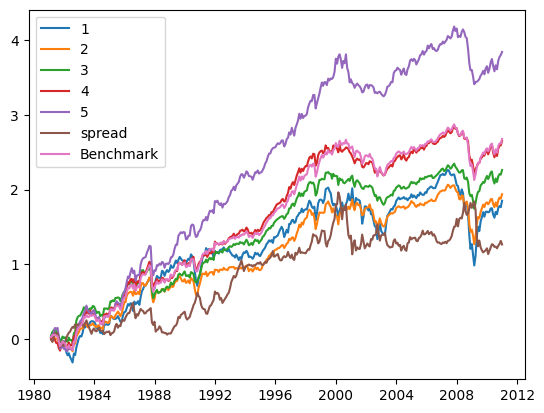

In [16]:
for label in ["1", "2", "3", "4", "5", "spread"]:
    plt.plot(port.index, np.log((port[label] + 1).cumprod()), label=label)
plt.plot(bmk.index, np.log((bmk + 1).cumprod()), label="Benchmark")
plt.legend()
plt.show()

In [13]:
# df.loc[(df['tic']=='AAPL')&(~df['cash'].isna().index)]

In [14]:
# # df = df.loc[~df['cashtoasset'].isna()]
# # df = df.loc[~df['currenttoassetlag'].isna()]
# df["mom_first"] = df.groupby('date')['momlag'].transform(pd.qcut,5,labels=[str(k) for k in range(1, 6)])
# # df["cashtoasset_first"] = df.groupby('date')['cashtoasset'].transform(pd.qcut,5,labels=["a", "b", "c", "d", "e"]),shift()
# # df["currenttoasset_first"] = df.groupby('date')['currenttoasset'].transform(pd.qcut,5,labels=["a", "b", "c", "d", "e"]).shift()
# # df["cashtoasset_second"] = df.groupby(['date', 'mom_first'])['cashtoasset'].transform(pd.qcut,5,labels=["a", "b", "c", "d", "e"]).shift()
# dfca = df.loc[~df['currenttoassetlag'].isna()]
# dfca["currenttoasset_second"] = dfca.groupby(['date', 'mom_first'])['currenttoassetlag'].transform(pd.qcut,5,labels=["a", "b", "c", "d", "e"])

In [15]:
# #Equal weighted, cash to asset ratio
# port = dfca.groupby(['date','mom_first','currenttoasset_second'])['ret'].mean()
# port = port.unstack(level=['mom_first','currenttoasset_second'])
# print('Summary statistics from month to month, mom-currentasset:')
# port['spread'] = port[('5', 'e')] - port[('1', 'a')]
# summary(port).round(4)